# Week 9 — Day 3: EDA (Fraud vs Legit)


In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
# load dataset
DATA_PATH = Path("..") / "data" / "raw" / "creditcard.csv"
df = pd.read_csv(DATA_PATH)

df.shape

(284807, 31)

### Plot Target Distribution

In [6]:
# count fraud vs legit class
class_counts = df["Class"].value_counts()
class_counts

Class
0    284315
1       492
Name: count, dtype: int64

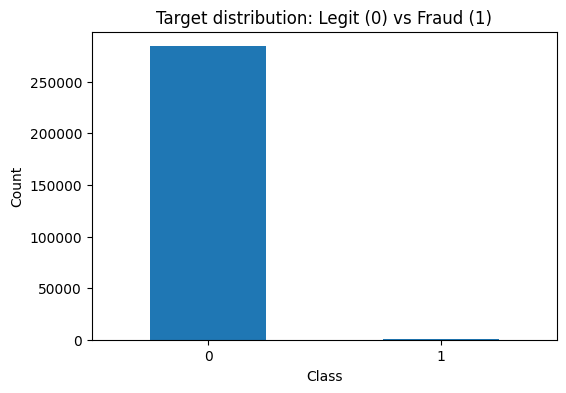

In [7]:
# bar chart
plt.figure(figsize=(6,4))
class_counts.plot(kind="bar")
plt.title("Target distribution: Legit (0) vs Fraud (1)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [9]:
# fraud percentage
fraud_rate = df["Class"].mean() * 100
print(f"Fraud percentage: {fraud_rate:.4f}%")

Fraud percentage: 0.1727%


### Compare Amount 

In [10]:
# Split fraud vs legit (Code cell)
fraud = df[df["Class"] == 1]
legit = df[df["Class"] == 0]

fraud.shape, legit.shape

((492, 31), (284315, 31))

In [13]:
# summary stats
fraud["Amount"].describe(), legit["Amount"].describe()

(count     492.000000
 mean      122.211321
 std       256.683288
 min         0.000000
 25%         1.000000
 50%         9.250000
 75%       105.890000
 max      2125.870000
 Name: Amount, dtype: float64,
 count    284315.000000
 mean         88.291022
 std         250.105092
 min           0.000000
 25%           5.650000
 50%          22.000000
 75%          77.050000
 max       25691.160000
 Name: Amount, dtype: float64)

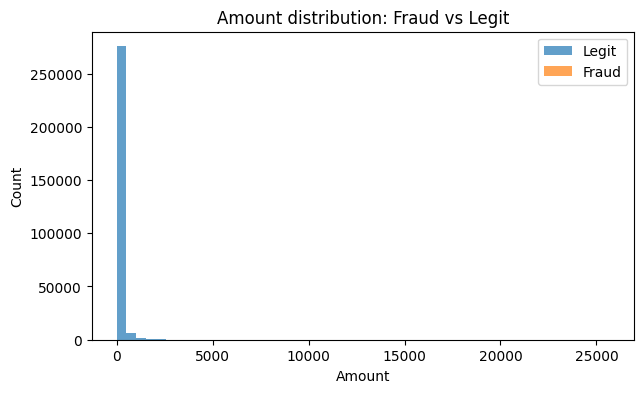

In [14]:
plt.figure(figsize=(7,4))
plt.hist(legit["Amount"], bins=50, alpha=0.7, label="Legit")
plt.hist(fraud["Amount"], bins=50, alpha=0.7, label="Fraud")
plt.title("Amount distribution: Fraud vs Legit")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.legend()
plt.show()

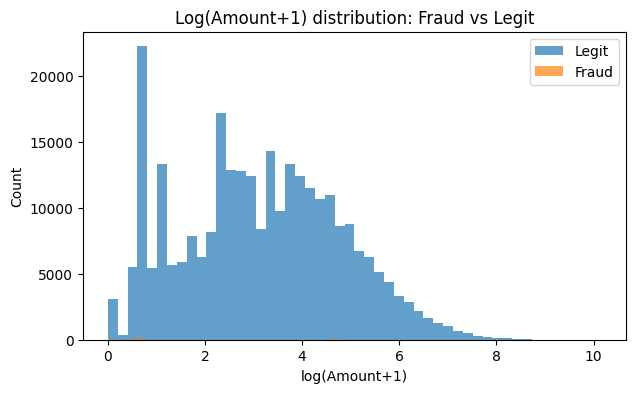

In [15]:
plt.figure(figsize=(7,4))
plt.hist(np.log1p(legit["Amount"]), bins=50, alpha=0.7, label="Legit")
plt.hist(np.log1p(fraud["Amount"]), bins=50, alpha=0.7, label="Fraud")
plt.title("Log(Amount+1) distribution: Fraud vs Legit")
plt.xlabel("log(Amount+1)")
plt.ylabel("Count")
plt.legend()
plt.show()

### Comparing some Key Features

In [16]:
features_to_check = ["Time", "Amount", "V1", "V2", "V3", "V4"]

In [17]:
# compare averages 
compare_means = df.groupby("Class")[features_to_check].mean()
compare_means

,Time,Amount,V1,V2,V3,V4
Class,,,,,,
0,94838.202258,88.291022,0.008258,-0.006271,0.012171,-0.007860
1,80746.806911,122.211321,-4.771948,3.623778,-7.033281,4.542029


In [18]:
# compare standard deviations
compare_std = df.groupby("Class")[features_to_check].std()
compare_std

,Time,Amount,V1,V2,V3,V4
Class,,,,,,
0,47484.015786,250.105092,1.929814,1.636146,1.459429,1.399333
1,47835.365138,256.683288,6.783687,4.291216,7.110937,2.873318


<Figure size 1000x600 with 0 Axes>

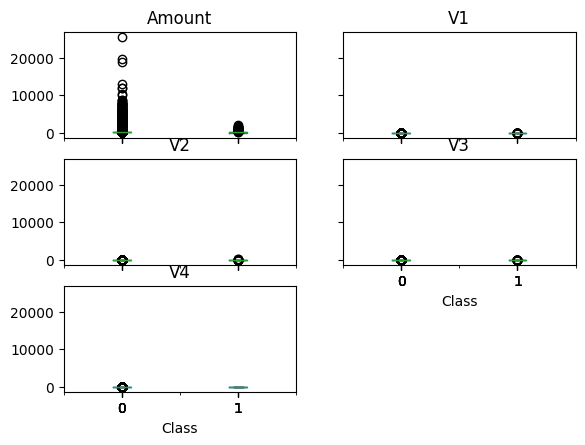

In [19]:
# visual comparison by boxplots
plt.figure(figsize=(10,6))
df.boxplot(column=["Amount", "V1", "V2", "V3", "V4"], by="Class", grid=False)
plt.suptitle("")
plt.title("Feature comparison by Class (0=Legit, 1=Fraud)")
plt.show()